In [1]:
%load_ext autoreload
%autoreload 2    
%matplotlib inline

import matplotlib.pyplot as plt
from murko.fileio import load, ls
from pathlib import Path
import numpy as np

In [2]:
path  = Path("./data/HouseExpo_json")
files = ls(path).files

envs = []
for i in range(len(files)):
    env = load(path/files[i])
    envs.append(env)

In [3]:
env = envs[21304]
env.keys()

dict_keys(['verts', 'id', 'room_category', 'room_num', 'bbox'])

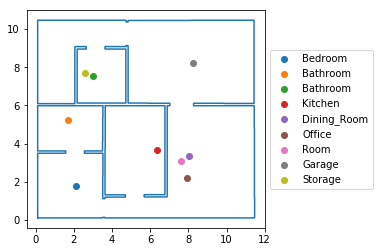

In [54]:
def draw_env(env,  figsize=(2,2), title=""):
    v = np.array(env["verts"])
    v = np.concatenate([v,v[[0]]], axis=0)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.gca().set_aspect(1.)
    plt.plot(*v.T, zorder=1) 
    for label, rooms in env["room_category"].items():
        for room in rooms:
            room = np.array(room)
#             plt.plot(room[[0,2]], room[[1,3]])
            x,y = sum(room[[0,2]])/2, sum(room[[1,3]])/2
            plt.scatter(x+np.random.randn()*0.5,y+np.random.randn()*0.5, label=f"{label}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
draw_env(env, (10,4))

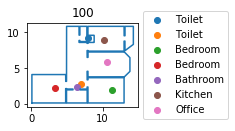

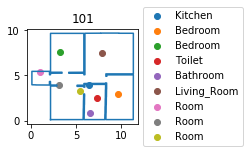

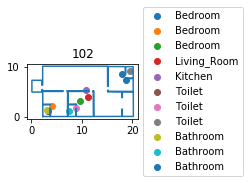

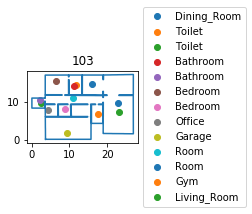

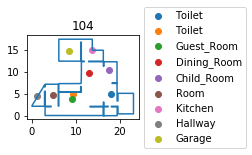

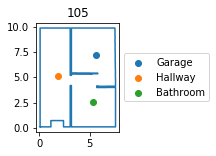

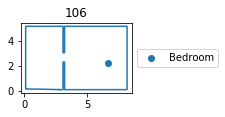

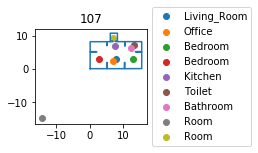

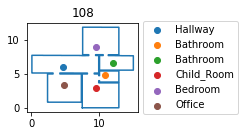

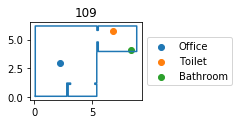

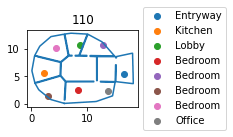

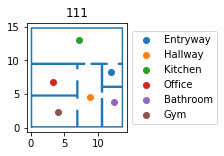

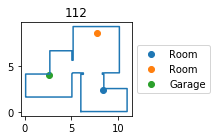

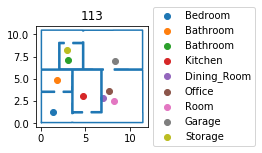

In [55]:
for i in range(100,114):
    env = envs[i]
    draw_env(env, (2,2), i)